In [1]:
pip install xlrd==1.2.0


     ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
     -------------------------------------  102.4/103.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 103.3/103.3 kB 1.0 MB/s eta 0:00:00


In [47]:
import xlrd
import os
current = os.getcwd()
path = os.path.join(current,"results.xlsx")
results = xlrd.open_workbook(path)
results = results.sheet_by_index(0)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the data from the Excel file
current = os.getcwd()
path = os.path.join(current, "results.xlsx")
df = pd.read_excel(path)

# Convert the string representation of lists to actual lists
df['Best Solutions By Generations Fitness'] = df['Best Solutions By Generations Fitness'].apply(eval)

# Get the number of generations for each row
num_generations = df['Best Solutions By Generations Fitness'].apply(len)

# Get the current directory to save the images
current_path = os.getcwd()

# Plot each row as a separate line plot and save as image files
for i, row in df.iterrows():
    generation_index = list(range(1, num_generations[i] + 1))
    plt.plot(generation_index, row['Best Solutions By Generations Fitness'])
    plt.xlabel("Generation")
    plt.ylabel("Best Solution Fitness")
    title_suffix = f"pop{row['Population Size']},mut{row['Mutation Rate']},gen{row['Number of Generations']},cvr{row['Crossover Function']},mut{row['Mutation Function']},recs{row['No. of Recommendations']}"
    plt.title(f"Best Solution Fitness By Generation (Run {i+1})\n{title_suffix}")
    # Shorten the title_suffix to a fixed number of characters (e.g., first 30 characters)
    title_suffix_shortened = title_suffix[:30]
    # Modify the filename to be Windows-compatible
    filename = f"plot_run_{i+1}_{title_suffix_shortened}.png".replace(":", "_")
    # Join the current path with the filename
    filepath = os.path.join(current_path, filename)
    plt.savefig(filepath)
    plt.clf()  # Clear the current figure for the next plot

plt.close()  # Close the last figure if any is left open


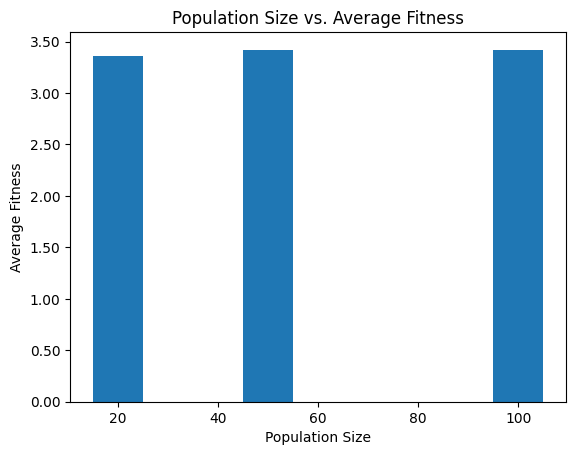

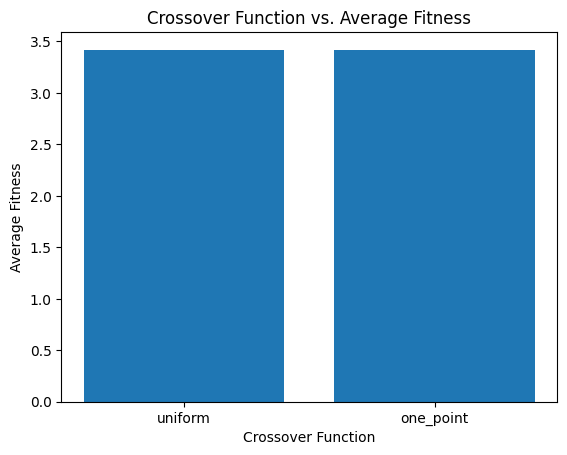

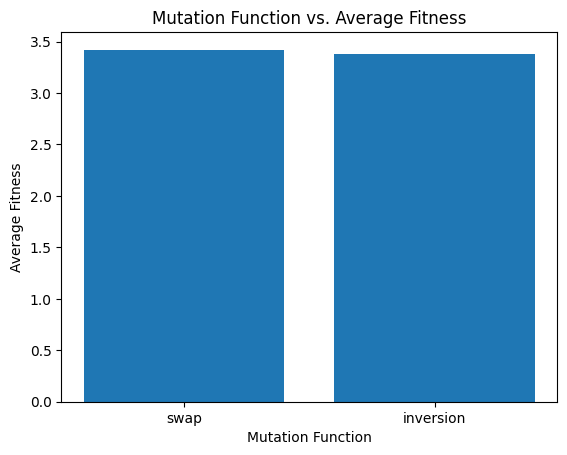

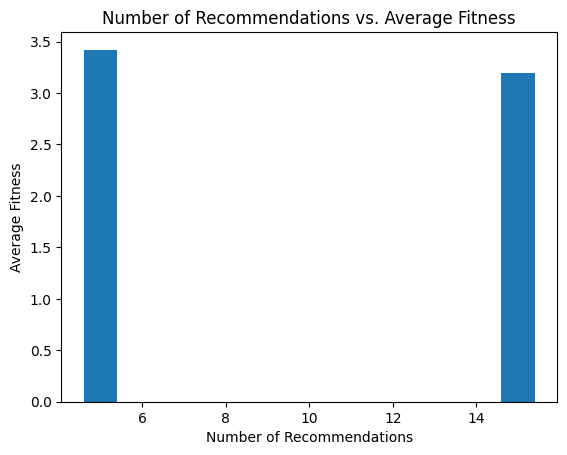

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot Population Size and Average Fitness
plt.bar(df["Population Size"], df["Best Average Solution"], width=10)
plt.xlabel("Population Size")
plt.ylabel("Average Fitness")
plt.title("Population Size vs. Average Fitness")

# Set the formatter for y-axis labels to display numbers in fixed decimal format
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))

plt.show()



# Plot Crossover Function and Average Fitness
plt.bar(df["Crossover Function"], df["Best Average Solution"])
plt.xlabel("Crossover Function")
plt.ylabel("Average Fitness")
plt.title("Crossover Function vs. Average Fitness")
plt.show()

# Plot Mutation Function and Average Fitness
plt.bar(df["Mutation Function"], df["Best Average Solution"])
plt.xlabel("Mutation Function")
plt.ylabel("Average Fitness")
plt.title("Mutation Function vs. Average Fitness")
plt.show()

# Plot Number of Recommendations and Average Fitness
plt.bar(df["No. of Recommendations"], df["Best Average Solution"])
plt.xlabel("Number of Recommendations")
plt.ylabel("Average Fitness")
plt.title("Number of Recommendations vs. Average Fitness")
plt.show()


In [ ]:
def import_semantic(file_name):
    file_path = f"dataset/{file_name}"
    with open(file_path, "r") as file:
        reader = csv.reader(file)
        semantic = [[int(value) for value in row] for row in reader]
    return semantic